# Exploratory Data Analysis - IPL

In [1]:
# Importing all the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Read the data from matches and deliveries csv files
df_matches = pd.read_csv(r"C:\Users\harsh\Desktop\matches.csv")
df_deliveries = pd.read_csv(r"C:\Users\harsh\Desktop\deliveries.csv")

In [24]:
# View the first five entries from match dataframe
df_matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
# View the first five entries from deliveries dataframe
df_deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


### Print metadata about dataframes

In [6]:
print(df_matches.info())
print(df_deliveries.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

### Find total number of NULL values in each column of matches dataframe

In [7]:
df_matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

### Find total number of NULL values in deliveries dataframe

In [12]:
print(df_deliveries.isnull().sum())

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64


### Find total number of NULL values in a "umpire3" column only

In [11]:
print(df_matches["umpire3"].isnull().sum())

637


In [15]:
# Find last 10 entries in a "player of match" column
df_matches["player_of_match"].tail(10)

746       JJ Bumrah
747          S Gill
748        A Mishra
749       S Hetmyer
750        KL Rahul
751       HH Pandya
752        AS Yadav
753         RR Pant
754    F du Plessis
755       JJ Bumrah
Name: player_of_match, dtype: object

### Statistical information of the data

In [19]:
df_matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [178]:
# Checking for missing values
print(df_matches.isnull().sum())
print(df_deliveries.isnull().sum())

# Cleaning Data: Removing duplicates
df_matches.drop_duplicates(inplace=True)
df_deliveries.drop_duplicates(inplace=True)

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64
match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype:

### Total number of innings of the matches played

In [39]:
df_deliveries["match_id"].max() * 2

22830

### How many IPL seasons are we using to analyse ?

In [59]:
print("Seasons: ",df_matches['season'].unique())
print("Total Seasons:",len(df_matches['season'].unique()))

Seasons:  [2017 2008 2009 2010 2011 2012 2013 2014 2015 2016 2018 2019]
Total Seasons: 12


### Total number of matches played according to the dataset

In [33]:
df_matches['id'].max()

11415

### Which IPL team won by maximum runs?

In [63]:
print("Team won by maximum runs:",df_matches.iloc[df_matches["win_by_runs"].idxmax()]["winner"])
print("Maximum Runs margin: ", df_matches["win_by_runs"].max())

Team won by maximum runs: Mumbai Indians
Maximum Runs margin:  146


### Which IPL team won by minimum runs ?

In [65]:
print("Team won by minimum runs:", df_matches.iloc[df_matches[df_matches["win_by_runs"].ge(1)].win_by_runs.idxmin()]["winner"])
print("Minimum runs margin:", df_matches[df_matches["win_by_runs"].ge(1)]["win_by_runs"].min())

Team won by minimum runs: Mumbai Indians
Minimum runs margin: 1


### Which IPL team won by consuming maximum wickets?

In [79]:
print("Team won by consuming maximum wickets: ",df_matches.iloc[df_matches[df_matches["win_by_wickets"].ge(1)].win_by_wickets.idxmax()]['winner'])
print("Maximum wickets count:", df_matches[df_matches["win_by_wickets"].ge(1)]["win_by_wickets"].max())

Team won by consuming maximum wickets:  Kolkata Knight Riders
Maximum wickets count: 10


### Which IPL team won by consuming minimum wickets?

In [179]:
print("Team won by consuming minimum wickets:", df_matches.iloc[df_matches[df_matches['win_by_wickets'].ge(1)].win_by_wickets.idxmin()]['winner'])
print("Minimum wickets count:", df_matches[df_matches["win_by_wickets"].ge(1)]["win_by_wickets"].min())

Team won by consuming minimum wickets: Kolkata Knight Riders
Minimum wickets count: 1


# Questions based on Visualization :

### Which season consisted of the highest number of matches ever played ?

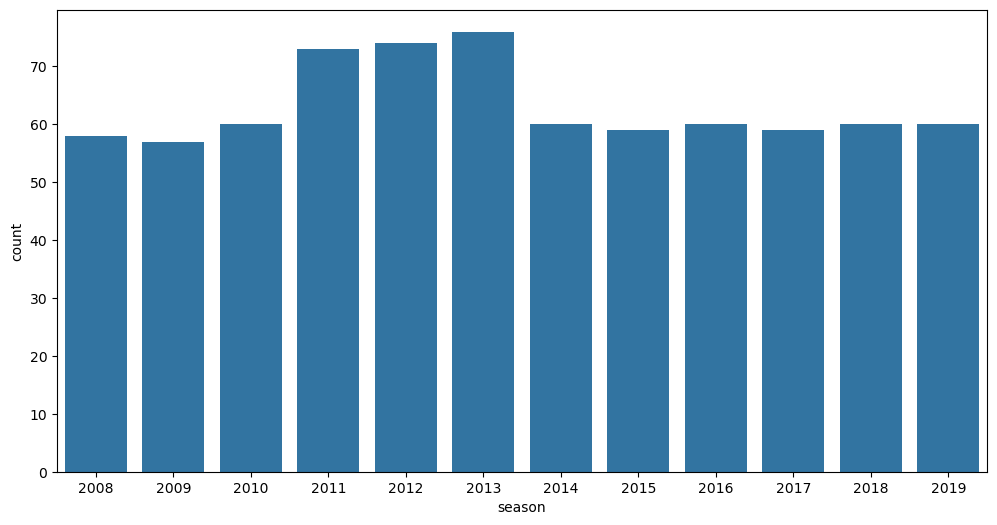

Highest number of matches in the season:  76


In [97]:

# Sets the size of the plot
plt.figure(figsize=(12, 6))

# Creates a bar plot to count matches per season.
sns.countplot(x="season", data=df_matches)

# Displays the plot.
plt.show()

# Highest number of matches
print("Highest number of matches in the season: ", df_matches["season"].value_counts().max())

### Observation: `Season 2013 has the most number of matches played.`

### Which is the most successful IPL team with all the data at hand?

Highest number of matches won: 109


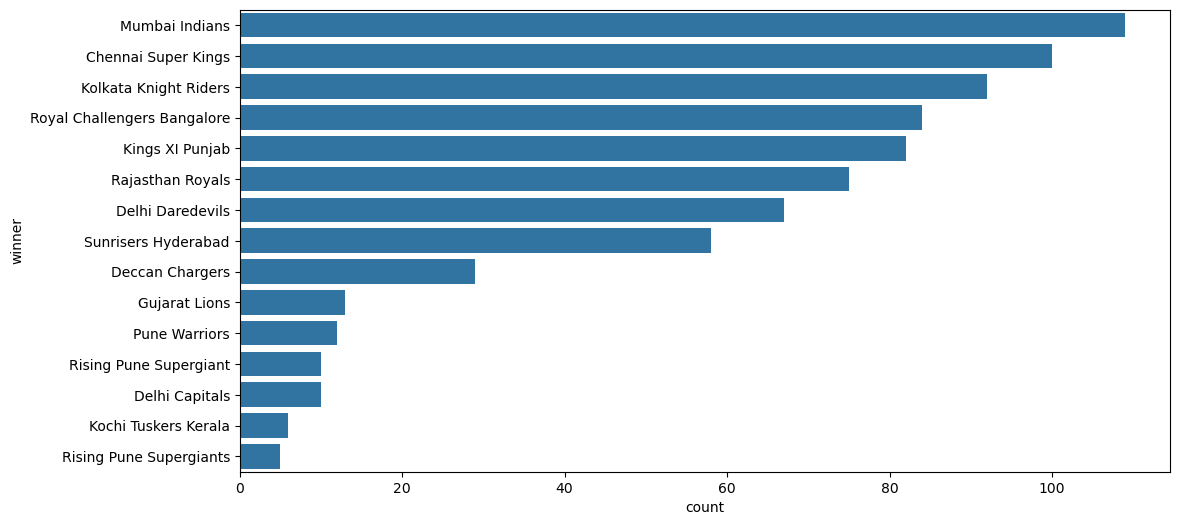

In [111]:

plt.figure(figsize=(12, 6))

# Counts the number of wins for each team.
data = df_matches["winner"].value_counts()
sns.barplot(y=data.index, x=data)

print("Highest number of matches won:", data.max())

Observation: **Mumbai Indians** is the most successful team so far.

### Top players of winning matches

<Axes: xlabel='player_of_match', ylabel='count'>

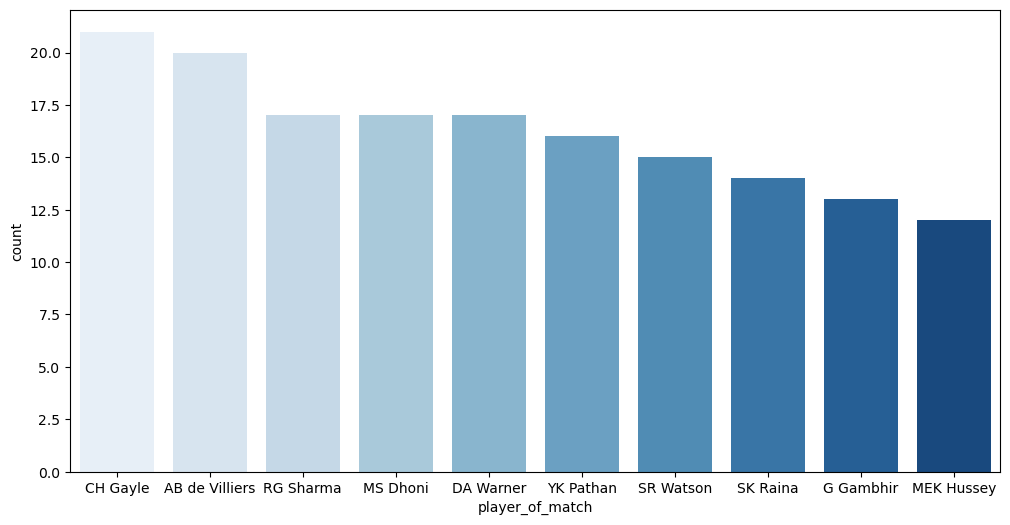

In [126]:
plt.figure(figsize=(12,6))
match_player = df_matches["player_of_match"].value_counts()[:10]
sns.barplot(x=match_player.index, y=match_player, orient='v', palette="Blues", hue=match_player.index)

Observation: **CH Gayle** is the most successful player in all match winners.

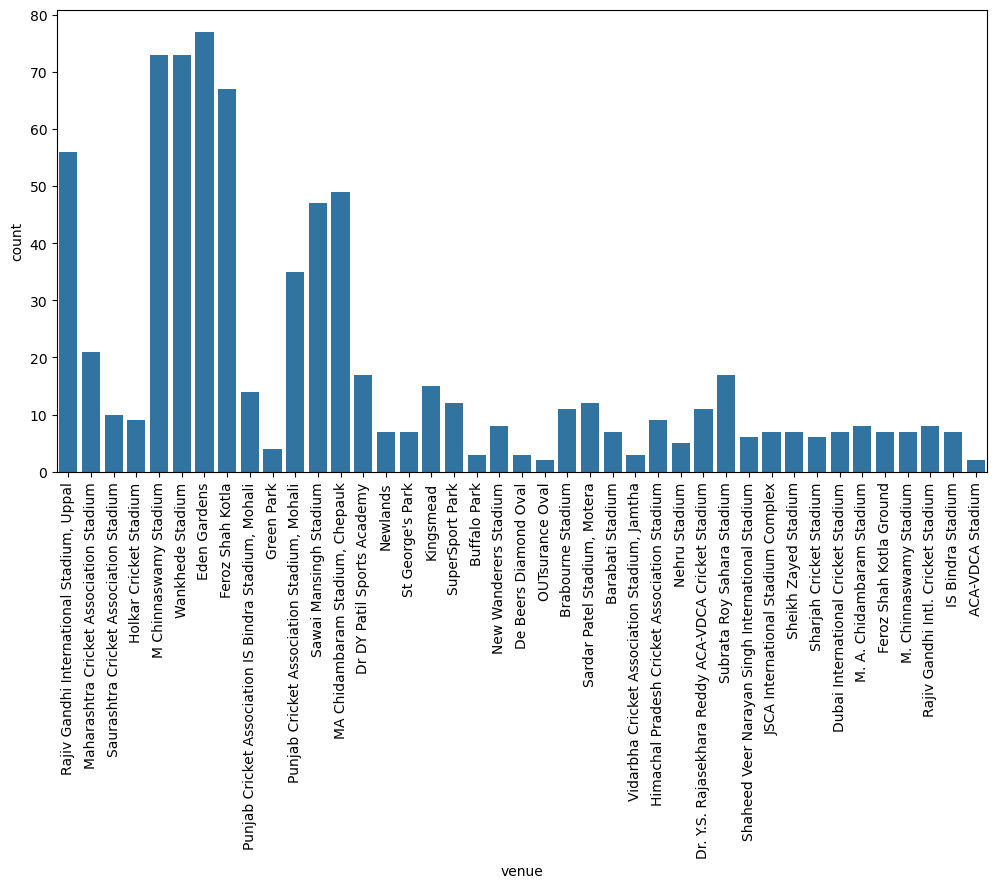

In [128]:
# Matches according to venue

plt.figure(figsize=(12, 6))
sns.countplot(x='venue', data=df_matches)
plt.xticks(rotation='vertical')
plt.show()

Observation: **Eden Gardens** has one of the most matches played.

### Number of matches played by each team

Number of matches played by each team:
Mumbai Indians                 187
Royal Challengers Bangalore    180
Kolkata Knight Riders          178
Kings XI Punjab                176
Chennai Super Kings            164
Delhi Daredevils               161
Rajasthan Royals               147
Sunrisers Hyderabad            108
Deccan Chargers                 75
Pune Warriors                   46
Gujarat Lions                   30
Rising Pune Supergiant          16
Delhi Capitals                  16
Kochi Tuskers Kerala            14
Rising Pune Supergiants         14
Name: count, dtype: int64


C:\Users\harsh\AppData\Local\Temp\ipykernel_3536\3277682750.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=teams_played.index, x=teams_played.values, palette='plasma')


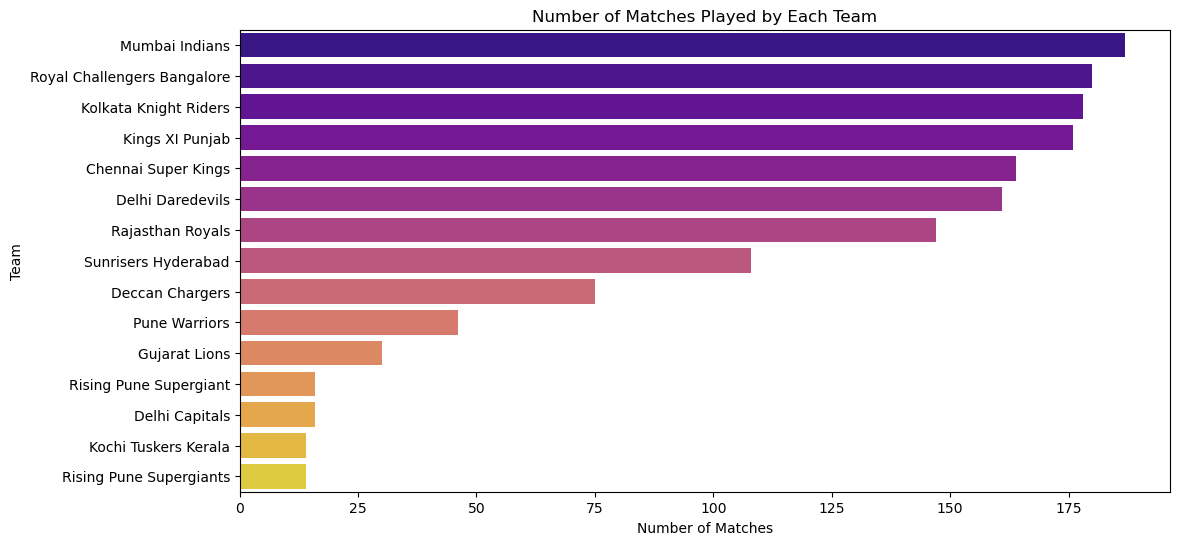

In [166]:
teams = pd.concat([df_matches['team1'], df_matches['team2']])
teams_played = teams.value_counts()
print("Number of matches played by each team:")
print(teams_played)
plt.figure(figsize=(12,6))
sns.barplot(y=teams_played.index, x=teams_played.values, palette='plasma')
plt.title("Number of Matches Played by Each Team")
plt.xlabel("Number of Matches")
plt.ylabel("Team")
plt.show()

Observation: **Mumbai Indians** has the highest number of matches played followed by **Royal Challengers Banglore**.

### Winner each season

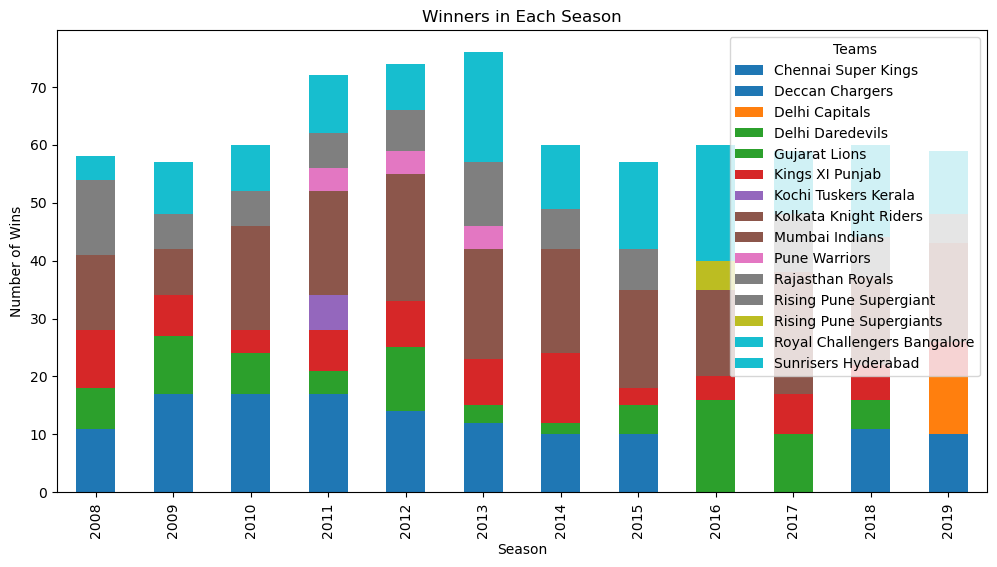

In [157]:

winners_per_season = df_matches.groupby('season')['winner'].value_counts().unstack()
winners_per_season.plot(kind='bar', stacked=True, figsize=(12,6), colormap='tab10')
plt.title("Winners in Each Season")
plt.xlabel("Season")
plt.ylabel("Number of Wins")
plt.legend(title="Teams")
plt.show()

### IPL Finals venues and winners along with the number of wins.

In [159]:

finals = df_matches.drop_duplicates(subset=['season'], keep='last')
finals_winners = finals[['season', 'venue', 'winner']]
print("IPL Finals venues and winners:")
print(finals_winners)

IPL Finals venues and winners:
     season                                      venue                 winner
58     2017  Rajiv Gandhi International Stadium, Uppal         Mumbai Indians
116    2008                 Dr DY Patil Sports Academy       Rajasthan Royals
173    2009                      New Wanderers Stadium        Deccan Chargers
233    2010                 Dr DY Patil Sports Academy    Chennai Super Kings
306    2011            MA Chidambaram Stadium, Chepauk    Chennai Super Kings
380    2012            MA Chidambaram Stadium, Chepauk  Kolkata Knight Riders
456    2013                               Eden Gardens         Mumbai Indians
516    2014                      M Chinnaswamy Stadium  Kolkata Knight Riders
575    2015                               Eden Gardens         Mumbai Indians
635    2016                      M Chinnaswamy Stadium    Sunrisers Hyderabad
695    2018                           Wankhede Stadium    Chennai Super Kings
755    2019         Rajiv Gandhi 

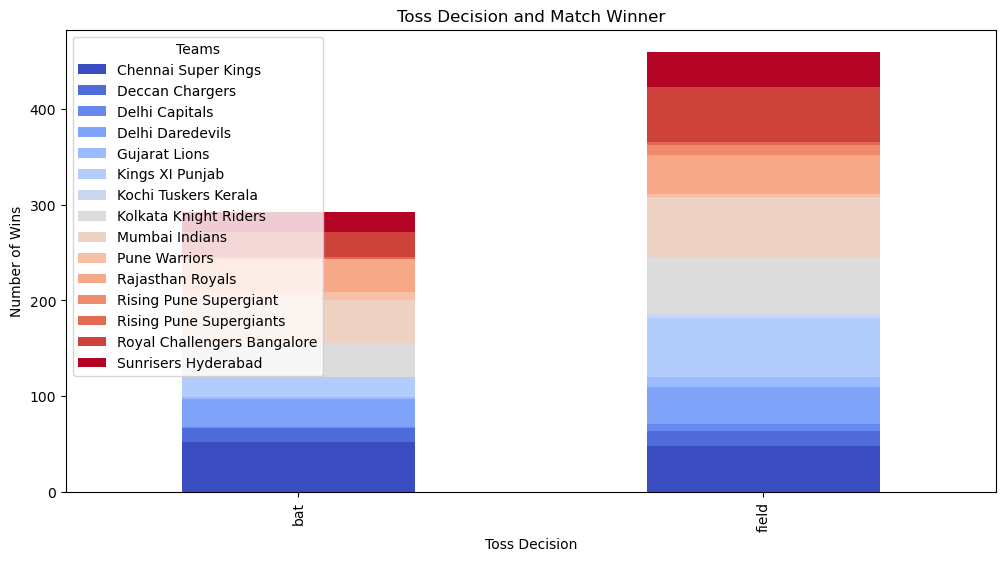

In [161]:
# Toss winner, toss decision, and match winner analysis
toss_decisions = df_matches.groupby(['toss_decision', 'winner']).size().unstack()
toss_decisions.plot(kind='bar', stacked=True, figsize=(12,6), colormap='coolwarm')
plt.title("Toss Decision and Match Winner")
plt.xlabel("Toss Decision")
plt.ylabel("Number of Wins")
plt.legend(title="Teams")
plt.show()

### Probability of winning if toss was won

In [180]:
toss_winners = df_matches[df_matches['toss_winner'] == df_matches['winner']]
toss_win_probability = len(toss_winners) / len(df_matches['toss_winner'])
print(f'Probability of winning a match if the toss was won: {toss_win_probability:.2f}')

Probability of winning a match if the toss was won: 0.52


### Total runs by sixes hit and total number of sixes hit by each team

In [181]:
sixes = df_deliveries[df_deliveries['batsman_runs'] == 6]
total_sixes_runs = sixes['batsman_runs'].sum()
team_sixes = sixes.groupby('batting_team')['batsman_runs'].count()
print(f'Total runs by sixes hit: {total_sixes_runs}')
print("Total number of sixes hit by each team:")
print(team_sixes)

Total runs by sixes hit: 49020
Total number of sixes hit by each team:
batting_team
Chennai Super Kings             973
Deccan Chargers                 400
Delhi Capitals                   87
Delhi Daredevils                801
Gujarat Lions                   155
Kings XI Punjab                 976
Kochi Tuskers Kerala             53
Kolkata Knight Riders           930
Mumbai Indians                 1096
Pune Warriors                   196
Rajasthan Royals                681
Rising Pune Supergiant           89
Rising Pune Supergiants          68
Royal Challengers Bangalore    1132
Sunrisers Hyderabad             533
Name: batsman_runs, dtype: int64


### Top 10 leading run scorers in IPL

Top 10 leading run scorers in IPL:
batsman
V Kohli           5434
SK Raina          5415
RG Sharma         4914
DA Warner         4741
S Dhawan          4631
CH Gayle          4560
MS Dhoni          4477
RV Uthappa        4444
AB de Villiers    4428
G Gambhir         4223
Name: batsman_runs, dtype: int64


C:\Users\harsh\AppData\Local\Temp\ipykernel_3536\2856747487.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_scorers.index, x=top_scorers.values, palette='cividis')


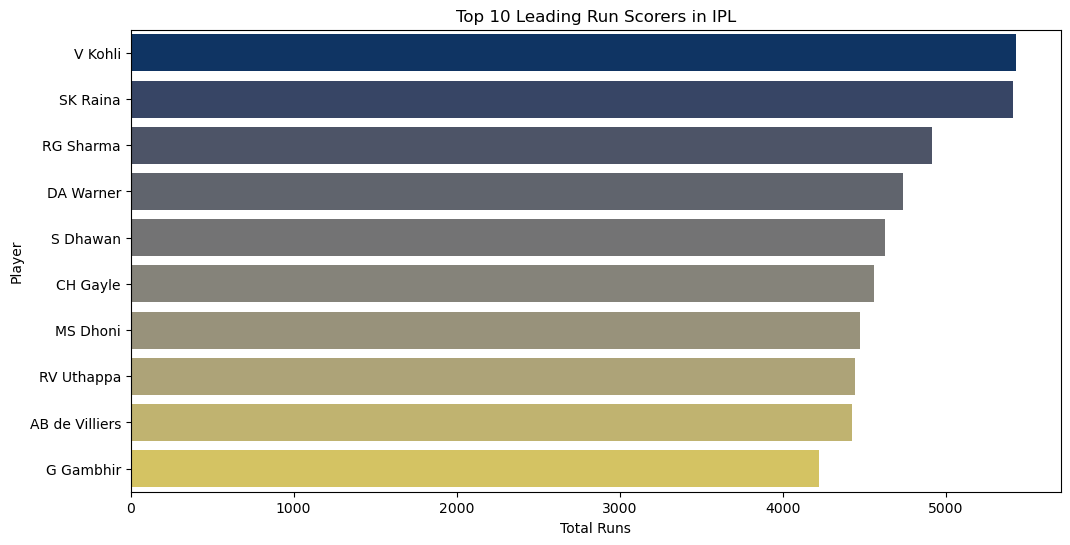

In [182]:
top_scorers = df_deliveries.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(10)
print("Top 10 leading run scorers in IPL:")
print(top_scorers)

plt.figure(figsize=(12,6))
sns.barplot(y=top_scorers.index, x=top_scorers.values, palette='cividis')
plt.title("Top 10 Leading Run Scorers in IPL")
plt.xlabel("Total Runs")
plt.ylabel("Player")
plt.show()

### Number of seasons won by each team

In [183]:
seasons_won = df_matches.drop_duplicates(subset=['season'], keep='last').groupby('winner')['season'].count()
print("Number of seasons won by each team:")
print(seasons_won)

Number of seasons won by each team:
winner
Chennai Super Kings      3
Deccan Chargers          1
Kolkata Knight Riders    2
Mumbai Indians           4
Rajasthan Royals         1
Sunrisers Hyderabad      1
Name: season, dtype: int64


### Man of the match for each winning team

In [184]:
finals_mom = finals[['winner', 'player_of_match']]
print("Man of the match for each winning team:")
print(finals_mom)

Man of the match for each winning team:
                    winner player_of_match
58          Mumbai Indians       KH Pandya
116       Rajasthan Royals       YK Pathan
173        Deccan Chargers        A Kumble
233    Chennai Super Kings        SK Raina
306    Chennai Super Kings         M Vijay
380  Kolkata Knight Riders        MS Bisla
456         Mumbai Indians      KA Pollard
516  Kolkata Knight Riders       MK Pandey
575         Mumbai Indians       RG Sharma
635    Sunrisers Hyderabad     BCJ Cutting
695    Chennai Super Kings       SR Watson
755         Mumbai Indians       JJ Bumrah


### Decision in every toss either fielding or batting

In [185]:
toss_decision_counts = df_matches['toss_decision'].value_counts()
print("Toss decision distribution:")
print(toss_decision_counts)

Toss decision distribution:
toss_decision
field    463
bat      293
Name: count, dtype: int64


### Total runs by fours hit and total number of fours hit by each team

In [186]:
fours = df_deliveries[df_deliveries['batsman_runs'] == 4]
total_fours_runs = fours['batsman_runs'].sum()
team_fours = fours.groupby('batting_team')['batsman_runs'].count()
print(f'Total runs by fours hit: {total_fours_runs}')
print("Total number of fours hit by each team:")
print(team_fours)

Total runs by fours hit: 81560
Total number of fours hit by each team:
batting_team
Chennai Super Kings            2193
Deccan Chargers                 957
Delhi Capitals                  242
Delhi Daredevils               2158
Gujarat Lions                   460
Kings XI Punjab                2458
Kochi Tuskers Kerala            170
Kolkata Knight Riders          2434
Mumbai Indians                 2588
Pune Warriors                   525
Rajasthan Royals               2034
Rising Pune Supergiant          197
Rising Pune Supergiants         171
Royal Challengers Bangalore    2360
Sunrisers Hyderabad            1443
Name: batsman_runs, dtype: int64


In [172]:
# The fours hit by players
player_fours = fours.groupby('batsman')['batsman_runs'].count().sort_values(ascending=False).head(10)
print("Top 10 players who hit the most fours:")
print(player_fours)

Top 10 players who hit the most fours:
batsman
S Dhawan      526
SK Raina      495
G Gambhir     492
V Kohli       482
DA Warner     459
RV Uthappa    436
RG Sharma     431
AM Rahane     405
CH Gayle      376
PA Patel      366
Name: batsman_runs, dtype: int64


### Number of fours hit in each season

Number of fours hit in each season:
season
2008    1703
2009    1321
2010    1709
2011    1916
2012    1911
2013    2054
2014    1563
2015    1611
2016    1633
2017    1612
2018    1673
2019    1684
Name: batsman_runs, dtype: int64


C:\Users\harsh\AppData\Local\Temp\ipykernel_3536\1379016384.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fours_per_season.index, y=fours_per_season.values, palette='coolwarm')


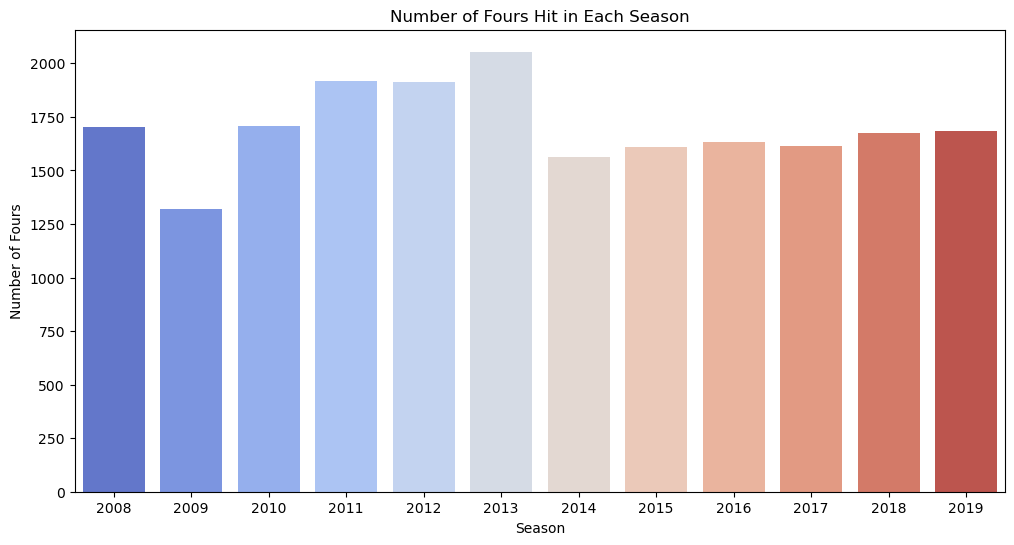

In [187]:
fours_per_season = fours.merge(df_matches[['id', 'season']], left_on='match_id', right_on='id').groupby('season')['batsman_runs'].count()
print("Number of fours hit in each season:")
print(fours_per_season)

# Visualizations
plt.figure(figsize=(12,6))
sns.barplot(x=fours_per_season.index, y=fours_per_season.values, palette='coolwarm')
plt.title("Number of Fours Hit in Each Season")
plt.xlabel("Season")
plt.ylabel("Number of Fours")
plt.show()

Number of sixes hit in each season:
season
2008    623
2009    508
2010    587
2011    639
2012    733
2013    681
2014    715
2015    692
2016    639
2017    706
2018    869
2019    778
Name: batsman_runs, dtype: int64


C:\Users\harsh\AppData\Local\Temp\ipykernel_3536\633445869.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sixes_per_season.index, y=sixes_per_season.values, palette='plasma')


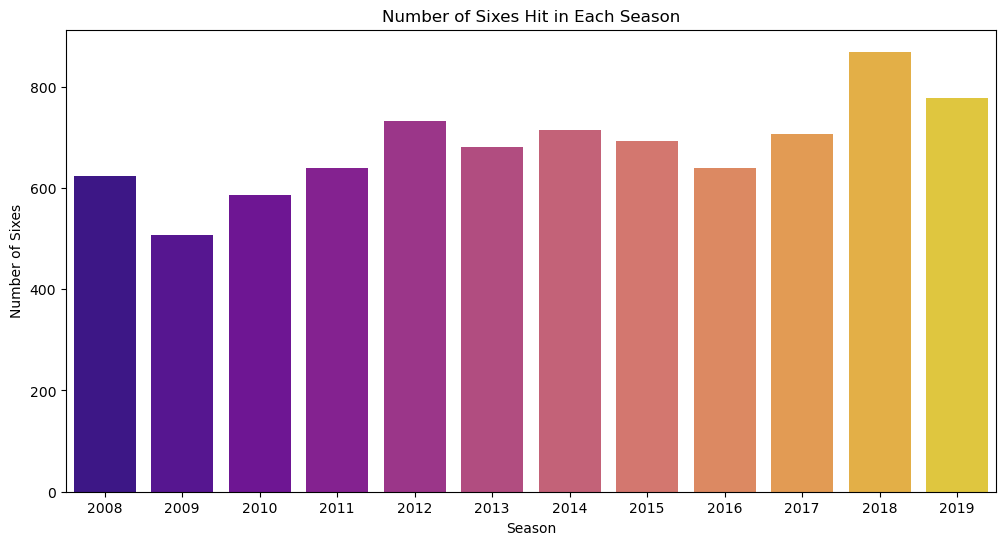

In [176]:
# Number of sixes hit in each season
sixes = df_deliveries[df_deliveries['batsman_runs'] == 6]
sixes_per_season = sixes.merge(df_matches[['id', 'season']], left_on='match_id', right_on='id').groupby('season')['batsman_runs'].count()
print("Number of sixes hit in each season:")
print(sixes_per_season)

plt.figure(figsize=(12,6))
sns.barplot(x=sixes_per_season.index, y=sixes_per_season.values, palette='plasma')
plt.title("Number of Sixes Hit in Each Season")
plt.xlabel("Season")
plt.ylabel("Number of Sixes")
plt.show()